## Test on a simple case
Consider the following Possion Equation
$$
\begin{cases}
    \Delta u = 1\qquad &u\in\Omega\\
    u = 0\qquad &u\in\partial\Omega.
\end{cases}$$
Here $\Omega = \{(x, y)|x^2+y^2 < 1\}$

The exact solution to this problem is $$u = \frac{1}{4}(x^2+y^2-1).$$

In [58]:
% matplotlib inline
import torch 
import torch.nn.functional as F
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm

torch.set_default_tensor_type('torch.FloatTensor')
'''
m = 10
learning_rate = 1e-2
iterations = 8000  #default 10000
print_every_iter = 100
beta = 500 #coefficient for the regularization term in the loss expression, is set to be 1000 in section 3.1
n1 = 500 #number of points in (0,1)^m
n2 = 100  #number of points on the border of (0,1)^m
n3 = 100  #number of points used for evaluating the error
'''
class DeepRitzNet(torch.nn.Module):
    def __init__(self, m):
        super(DeepRitzNet, self).__init__()
        self.linear1 = torch.nn.Linear(m,m)
        self.linear2 = torch.nn.Linear(m,m)
        self.linear3 = torch.nn.Linear(m,m)
        self.linear4 = torch.nn.Linear(m,m)
        self.linear5 = torch.nn.Linear(m,m)
        self.linear6 = torch.nn.Linear(m,m)
        
        self.linear7 = torch.nn.Linear(m,1)
        
        torch.nn.init.normal_(self.linear1.weight, 0.1)
        torch.nn.init.constant_(self.linear1.bias, 0)
        torch.nn.init.normal_(self.linear2.weight, 0.1)
        torch.nn.init.constant_(self.linear2.bias, 0)
        torch.nn.init.normal_(self.linear3.weight, 0.1)
        torch.nn.init.constant_(self.linear3.bias, 0)
        torch.nn.init.normal_(self.linear4.weight, 0.1)
        torch.nn.init.constant_(self.linear4.bias, 0)
        torch.nn.init.normal_(self.linear5.weight, 0.1)
        torch.nn.init.constant_(self.linear5.bias, 0)
        torch.nn.init.normal_(self.linear6.weight, 0.1)
        torch.nn.init.constant_(self.linear6.bias, 0)
        torch.nn.init.normal_(self.linear7.weight, 0.1)
        torch.nn.init.constant_(self.linear7.bias, 0)
        
        '''
        torch.nn.init.constant_(self.linear1.weight, 1)
        torch.nn.init.constant_(self.linear1.bias, 0)
        torch.nn.init.constant_(self.linear2.weight, 1)
        torch.nn.init.constant_(self.linear2.bias, 0)
        torch.nn.init.constant_(self.linear3.weight, 1)
        torch.nn.init.constant_(self.linear3.bias, 0)
        torch.nn.init.constant_(self.linear4.weight, 1)
        torch.nn.init.constant_(self.linear4.bias, 0)
        torch.nn.init.constant_(self.linear5.weight, 1)
        torch.nn.init.constant_(self.linear5.bias, 0)
        torch.nn.init.constant_(self.linear6.weight, 1)
        torch.nn.init.constant_(self.linear6.bias, 0)
        torch.nn.init.constant_(self.linear7.weight, 1)
        torch.nn.init.constant_(self.linear7.bias, 0)
        '''
    
    def forward(self, x):
        y = (F.relu(self.linear1(x))) ** 2
        y = (F.relu(self.linear2(x))) ** 2
        y += x
        x = y
        y = (F.relu(self.linear3(x))) ** 2
        y = (F.relu(self.linear4(x))) ** 2
        y += x
        x = y
        y = (F.relu(self.linear5(x))) ** 2
        y = (F.relu(self.linear6(x))) ** 2
        y += x
        y = (F.relu(self.linear7(x)))
        return y

In [59]:
def draw_graph():
    points = np.arange(-1, 1, 0.1)
    xs, ys = np.meshgrid(points, points)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    xl, yl = xs.size()
    z = np.zeros((xl, yl))
    for i in range(xl):
        for j in range(yl):      
            re = np.zeros(m)
            re[0] = xs[i, j]
            re[1] = ys[i, j]
            re = torch.tensor(re)        
            z[i, j] = model(re.float()).item() - U_groundtruth(re)
    
    plt.imshow(z, cmap=cm.hot)
    plt.colorbar()
    plt.show()

In [60]:
#U_groundtruth = 1/4*(x^2+y^2)-1/4
#take in a (m,) tensor (x, y, ...)
def U_groundtruth(t):
    re = (t[0] ** 2 + t[1] ** 2 - 1).item() / 4
    return re

#turn a (2,) tensor/ndarray to a (m,) tensor
def zeropad(x_2, m):
    x_10 = torch.zeros(m, )
    x_10[0] = x_2[0]
    x_10[1] = x_2[1]
    return x_10
    
#sample a (m,) tensor on the border of the unit circle
def on_sample(m):
    theta = np.random.rand() * 2 * math.pi
    re = np.zeros(m)
    re[0] = math.cos(theta)
    re[1] = math.sin(theta)
    re = torch.tensor(re, requires_grad=True=00
    return re

#sample a (m,) tensor in the unit circle
def in_sample(m):
    r = math.sqrt(np.random.rand())
    theta = np.random.rand() * 2 * math.pi
    re = np.zeros(m)
    re[0] = r * math.cos(theta)
    re[1] = r * math.sin(theta)
    re = torch.tensor(re, requires_grad=True)
    return re

SyntaxError: invalid syntax (<ipython-input-60-24b0bbc4286b>, line 20)

In [22]:
'''
m = 10
learning_rate = 1e-2
iterations = 8000  #default 10000
print_every_iter = 100
beta = 500 #coefficient for the regularization term in the loss expression, is set to be 1000 in section 3.1
n1 = 500 #number of points in (0,1)^m
n2 = 100  #number of points on the border of (0,1)^m
n3 = 100  #number of points used for evaluating the error
'''

def train_model(m,learning_rate,iterations,beta,n1,n2,n3):    
    model = DeepRitzNet(m)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    #in_error_iter = [] #record the error in Omega every print_every_iter=100 times
    #on_error_iter = [] #record the error on the border of Omega every print_every_iter=100 times
    
    final_loss = torch.zeros(1)
    for i in range(iterations):
        #calculate the loss 
        loss = torch.zeros(1)
        for t in range(n1):
            #if I miss out the ".float()" there will be an error and I don't know why
            #It seems to have something to do with the usage of relu()**3 in DeepRitzNet
            x_input = in_sample(m)
            y = model(x_input.float())
            #there will be an error without "retain_graph=True" , I don't know why
            y.backward(retain_graph = True)

            loss += 0.5 * ((x_input.grad.float()[0]) ** 2 + (x_input.grad.float()[1]) ** 2) + y
        loss /= n1
        #print(loss)

        regularization = torch.zeros(1)
        for t in range(n2):
            x_input = on_sample(m).float()
            y = model(x_input)
            regularization += y ** 2   
        regularization *= beta / n2

        #print(regularization)

        loss += regularization
        final_loss=torch.max(final_loss, loss)

        #draw_graph()

        #and step the optimizer
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #draw_graph()
    '''
    #print the error
        if((i+1) % print_every_iter == 0):
            in_error = 0
            on_error = 0

            for t in range(n3):
                in_x_test = in_sample(m)
                in_error_instant = abs((model(in_x_test.float()) -
                                        U_groundtruth(in_x_test.float())).item())
                in_error = max(in_error, in_error_instant)

                on_x_test = on_sample(m)
                on_error_instant = abs((model(on_x_test.float()) -
                                        U_groundtruth(on_x_test.float())).item())
                on_error = max(on_error,on_error_instant)

            in_error_iter.append(in_error)
            on_error_iter.append(on_error)

            print("Loss and regularization at the", i+1,"th iteration are:",loss, regularization)
            print("Error in Omega at the",i+1,"th iteration:",in_error)
            print("Error on the border of Omega at the",i+1,"th iteration:",on_error)
            draw_graph()
    '''
    #training completed
    in_error=0
    on_error=0
    for t in range(n3):
        in_x_test = in_sample(m)
        in_error_instant = abs((model(in_x_test.float()) -
                                U_groundtruth(in_x_test.float())).item())
        in_error = max(in_error, in_error_instant)

        on_x_test = on_sample(m)
        on_error_instant = abs((model(on_x_test.float()) -
                                U_groundtruth(on_x_test.float())).item())
        on_error = max(on_error,on_error_instant)
        
    print("learning rate:",learning_rate)
    print("beta:",beta)
    print("Error in Omega:",in_error)
    print("Error on the border of Omega:",on_error)
    print("Loss:",final_loss)
    print("Traning Completed. ")

In [23]:
#def train_model(m,learning_rate,iterations,beta,n1,n2,n3)
m=10
learning_rate=1e-2
iterations=8000
beta=100
n1=500
n2=100
n3=100
train_model(m=m,learning_rate=learning_rate,iterations=iterations,beta=beta,n1=n1,n2=n2,n3=n3)

learning rate: 0.01
beta: 100
Error in Omega: 0.24764646589756012
Error on the border of Omega: 5.340666029951535e-05
Traning Completed. 


In [ ]:
for beta in [1,10,100,200,500]:
    train_model(m=m,learning_rate=learning_rate,iterations=iterations,beta=beta,n1=n1,n2=n2,n3=n3)

Loss at the 100 th iteration: tensor(1.00000e-03 *
       [ 1.8613])
du/dx at the 100 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 100 th iteration: 0.2513088881969452
Error on the border of Omega at the 100 th iteration: 2.9802322387695312e-08


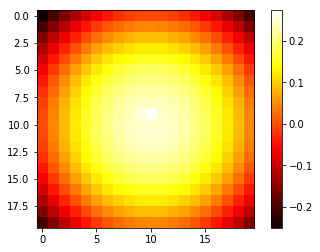

Loss at the 200 th iteration: tensor(1.00000e-04 *
       [ 3.9080])
du/dx at the 200 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 200 th iteration: 0.24915993213653564
Error on the border of Omega at the 200 th iteration: 2.9802322387695312e-08


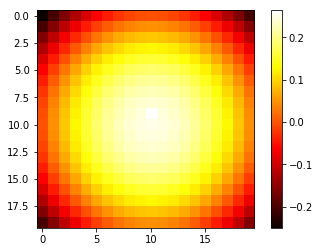

Loss at the 300 th iteration: tensor([ 0.])
du/dx at the 300 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 300 th iteration: 0.24223826825618744
Error on the border of Omega at the 300 th iteration: 2.9802322387695312e-08


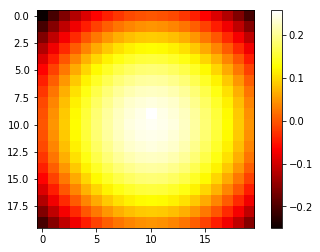

Loss at the 400 th iteration: tensor(1.00000e-04 *
       [ 1.9630])
du/dx at the 400 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 400 th iteration: 0.2474449723958969
Error on the border of Omega at the 400 th iteration: 2.9802322387695312e-08


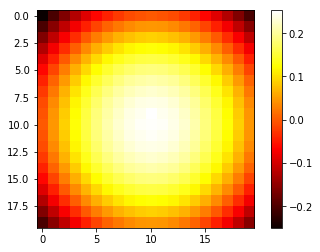

Loss at the 500 th iteration: tensor([ 0.])
du/dx at the 500 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 500 th iteration: 0.2487640678882599
Error on the border of Omega at the 500 th iteration: 2.9802322387695312e-08


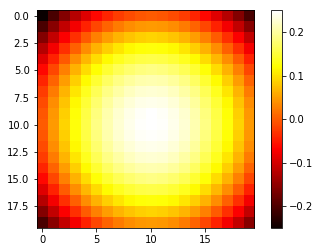

Loss at the 600 th iteration: tensor(1.00000e-04 *
       [ 1.3628])
du/dx at the 600 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 600 th iteration: 0.24992020428180695
Error on the border of Omega at the 600 th iteration: 2.9802322387695312e-08


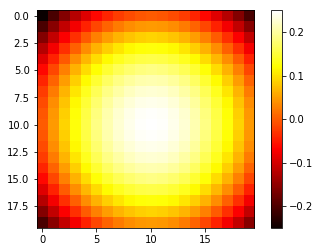

Loss at the 700 th iteration: tensor(1.00000e-04 *
       [ 2.8592])
du/dx at the 700 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 700 th iteration: 0.2511962354183197
Error on the border of Omega at the 700 th iteration: 2.9802322387695312e-08


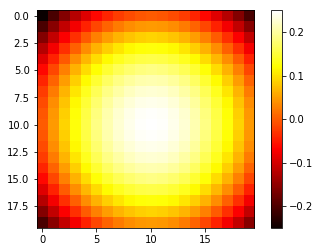

Loss at the 800 th iteration: tensor([ 0.])
du/dx at the 800 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 800 th iteration: 0.24753715097904205
Error on the border of Omega at the 800 th iteration: 2.9802322387695312e-08


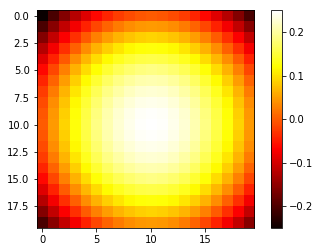

Loss at the 900 th iteration: tensor([ 0.])
du/dx at the 900 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 900 th iteration: 0.24974188208580017
Error on the border of Omega at the 900 th iteration: 2.9802322387695312e-08


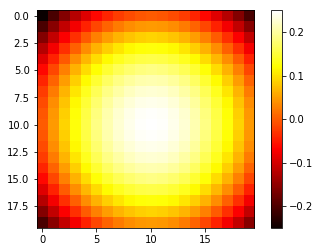

Loss at the 1000 th iteration: tensor([ 0.])
du/dx at the 1000 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 1000 th iteration: 0.24811367690563202
Error on the border of Omega at the 1000 th iteration: 2.9802322387695312e-08


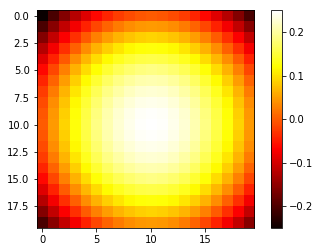

Loss at the 1100 th iteration: tensor(1.00000e-05 *
       [ 1.6451])
du/dx at the 1100 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 1100 th iteration: 0.2458067387342453
Error on the border of Omega at the 1100 th iteration: 2.9802322387695312e-08


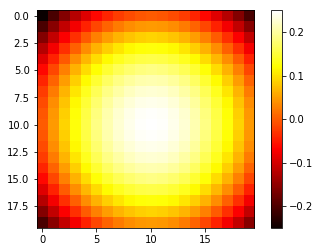

Loss at the 1200 th iteration: tensor([ 0.])
du/dx at the 1200 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 1200 th iteration: 0.2483600378036499
Error on the border of Omega at the 1200 th iteration: 2.9802322387695312e-08


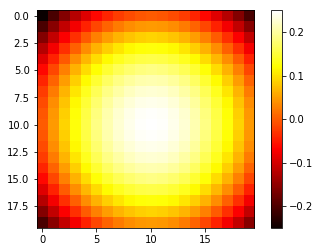

Loss at the 1300 th iteration: tensor([ 0.])
du/dx at the 1300 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 1300 th iteration: 0.24661853909492493
Error on the border of Omega at the 1300 th iteration: 2.9802322387695312e-08


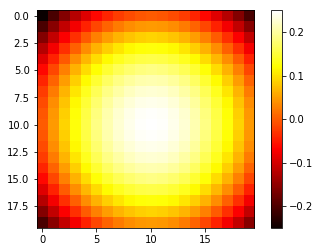

Loss at the 1400 th iteration: tensor([ 0.])
du/dx at the 1400 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 1400 th iteration: 0.24876999855041504
Error on the border of Omega at the 1400 th iteration: 2.9802322387695312e-08


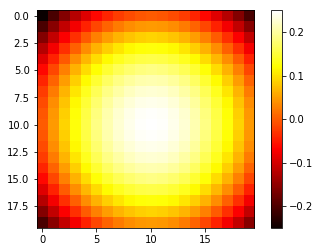

Loss at the 1500 th iteration: tensor([ 0.])
du/dx at the 1500 th iteration: ( tensor(0.) , tensor(0.) )
Error in Omega at the 1500 th iteration: 0.249965101480484
Error on the border of Omega at the 1500 th iteration: 2.9802322387695312e-08


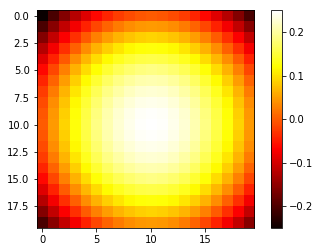

KeyboardInterrupt: 

In [62]:
m = 10
learning_rate = 1e-2
iterations = 8000  #default 10000
print_every_iter = 100
beta = 1 #coefficient for the regularization term in the loss expression, is set to be 1000 in section 3.1
n1 = 500 #number of points in (0,1)^m
n2 = 100  #number of points on the border of (0,1)^m
n3 = 100  #number of points used for evaluating the error

model = DeepRitzNet(m)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for i in range(iterations):
    #calculate the loss 
    loss=torch.zeros(1)
    for t in range(n1):
        #if I miss out the ".float()" there will be an error and I don't know why
        #It seems to have something to do with the usage of relu()**3 in DeepRitzNet
        x_input=in_sample(m)
        y=model(x_input.float())
        #there will be an error without "retain_graph=True" , I don't know why
        y.backward(retain_graph=True)
        loss+=0.5*((x_input.grad.float()[0])**2+(x_input.grad.float()[1])**2)+y
    loss/=n1
    
    regularization=torch.zeros(1)
    for t in range(n2):
        x_input=on_sample(m).float()
        y=model(x_input)
        regularization+=y**2   
    regularization*=beta/n2
    
    loss+=regularization
    
    #and step the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #print the error
    if((i+1)%print_every_iter==0):
        in_error=0
        on_error=0
        
        for t in range(n3):
            in_x_test=in_sample(m)
            in_error_instant=abs((model(in_x_test.float())-U_groundtruth(in_x_test.float())).item())
            in_error=max(in_error,in_error_instant)
            
            on_x_test=on_sample(m)
            on_error_instant=abs((model(on_x_test.float())-U_groundtruth(on_x_test.float())).item())
            on_error=max(on_error,on_error_instant)
            
        #in_error_iter.append(in_error)
        #on_error_iter.append(on_error)
        
        print("Loss at the",i+1,"th iteration:", loss)
        
        x_input=in_sample(m)
        y=model(x_input.float())
        #there will be an error without "retain_graph=True" , I don't know why
        y.backward(retain_graph=True)
        print("du/dx at the", i+1,"th iteration: (",x_input.grad.float()[0],",",x_input.grad.float()[1],")")
        
        print("Error in Omega at the",i+1,"th iteration:",in_error)
        print("Error on the border of Omega at the",i+1,"th iteration:",on_error)
        draw_graph()
        
print("Traning Completed.")